In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import halotools
import scipy.stats
from scipy.optimize import curve_fit

In [2]:
RawVoidCats = []

nrand_steps = 5
beta_steps  = 5

beta  = np.linspace(1.2, 2.0, beta_steps)
nrand = np.linspace(1.0, 1.8, nrand_steps)

CounterZero = 60


for i in range(CounterZero,80):
    dataset = np.loadtxt("volume_and_excentricity/{}.vae".format(i), 
                         delimiter=",",
                         dtype=[('ID', 'i8'),('x', 'f8'), ('y', 'f8'),('z', 'f8'),
                               ('N', 'i8'),('R', 'f8'),('a', 'f8'),('b', 'f8'), ('c', 'f8'), 
                               ('a_x', 'f8'), ('a_y', 'f8'), ('a_z', 'f8'),
                               ('b_x', 'f8'), ('b_y', 'f8'), ('b_z', 'f8'),
                               ('c_x', 'f8'), ('c_y', 'f8'), ('c_z', 'f8')])
    j = i % nrand_steps
    k = (i-CounterZero)//nrand_steps 
    
    RawVoidCats.append([i, beta[j], np.round(nrand[k], decimals=1), dataset])   
    
nrand_steps = 4

beta = 1.0
nrand = np.linspace(1.0, 1.6, nrand_steps)
CounterZero = 50

for i in range(CounterZero, 54):
    dataset = np.loadtxt("volume_and_excentricity/{}.vae".format(i), 
                         delimiter=",", 
                         dtype=[('ID', 'i8'),('x', 'f8'), ('y', 'f8'),('z', 'f8'),
                               ('N', 'i8'),('R', 'f8'),('a', 'f8'),('b', 'f8'), ('c', 'f8'), 
                               ('a_x', 'f8'), ('a_y', 'f8'), ('a_z', 'f8'),
                               ('b_x', 'f8'), ('b_y', 'f8'), ('b_z', 'f8'),
                               ('c_x', 'f8'), ('c_y', 'f8'), ('c_z', 'f8')])
    k = (i - CounterZero) % nrand_steps
    RawVoidCats.append([i, beta, np.round(nrand[k], decimals=1), dataset])
    
nrand_steps = 4
nrand = 1.8
beta  = np.linspace(1.0, 1.6, nrand_steps)
beta  = np.round(beta, decimals=1)
CounterZero = 30

for i in range(30, 34):
    dataset = np.loadtxt("volume_and_excentricity/{}.vae".format(i), 
                         delimiter=",", 
                         dtype=[('ID', 'i8'),('x', 'f8'), ('y', 'f8'),('z', 'f8'),
                               ('N', 'i8'),('R', 'f8'),('a', 'f8'),('b', 'f8'), ('c', 'f8'), 
                               ('a_x', 'f8'), ('a_y', 'f8'), ('a_z', 'f8'),
                               ('b_x', 'f8'), ('b_y', 'f8'), ('b_z', 'f8'),
                               ('c_x', 'f8'), ('c_y', 'f8'), ('c_z', 'f8')])
    k = (i - CounterZero) % nrand_steps
    RawVoidCats.append([i, beta[k], nrand, dataset])
    
i = 36 
dataset = np.loadtxt("volume_and_excentricity/{}.vae".format(i), 
                     delimiter=",", 
                     dtype=[('ID', 'i8'),('x', 'f8'), ('y', 'f8'),('z', 'f8'),
                               ('N', 'i8'),('R', 'f8'),('a', 'f8'),('b', 'f8'), ('c', 'f8'), 
                               ('a_x', 'f8'), ('a_y', 'f8'), ('a_z', 'f8'),
                               ('b_x', 'f8'), ('b_y', 'f8'), ('b_z', 'f8'),
                               ('c_x', 'f8'), ('c_y', 'f8'), ('c_z', 'f8')])
beta  = 1.0
nrand = 2.0
RawVoidCats.append([i, beta, nrand, dataset])


In [3]:
BoxLength = 720
Trim = 30
R_cut = 10

def TrimCatalog(ellip_cat):    
    halfboxtrim = BoxLength/2 - Trim

    index = np.where( 
            (abs(ellip_cat["x"]) < halfboxtrim) & 
            (abs(ellip_cat["y"]) < halfboxtrim) & 
            (abs(ellip_cat["z"]) < halfboxtrim) & 
             ( ellip_cat["R"]  > R_cut  ) )
    
    return ellip_cat[index]

def ellipticity(a,b,c):
    return (1/4.)*((a**2 - c**2) / (a**2 + b**2 + c**2))

def prolatness(a,b,c):
    return(1/4.)*( (b**2-c**2)+(b**2 - a**2)) / (a**2 + b**2 + c**2)


## To do the prolate/oblate scatter plot.
def density_estimation(m1, m2, xmin, xmax, ymin, ymax):
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]                                                     
    positions = np.vstack([X.ravel(), Y.ravel()])                                                       
    values = np.vstack([m1, m2])                                                                        
    kernel = scipy.stats.gaussian_kde(values)                                                                 
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z

Volume = (BoxLength - 2*Trim) ** 3
print(Volume)

287496000


In [4]:
VoidCats = []

for i in range(len(RawVoidCats)):
    j     = RawVoidCats[i][0]
    beta  = RawVoidCats[i][1]
    nrand = RawVoidCats[i][2]
    #print(j, beta, nrand, len(RawVoidCats[i][-1]))
    VoidCats.append([beta, nrand, TrimCatalog(RawVoidCats[i][3])])



nan_array = np.zeros((1,1))
    
VoidCats.append([1.2, 2.0, nan_array])
VoidCats.append([1.4, 2.0, nan_array])
VoidCats.append([1.6, 2.0, nan_array])
VoidCats.append([1.8, 1.8, nan_array])
VoidCats.append([1.8, 2.0, nan_array])
VoidCats.append([2.0, 1.8, nan_array])
VoidCats.append([2.0, 2.0, nan_array])

In [5]:
VoidCats.sort(key = lambda x: x[1])
VoidCats.sort(key = lambda x: x[0])

In [6]:
alpha = 0.05

In [7]:
alpha = 0.01

N = 0

print("Beta  r   D  pvalue theta_size ")


for i in range(len(VoidCats)):    
    if(VoidCats[i][2].shape != (1,1)):
        beta   = VoidCats[i][0]
        nrand  = VoidCats[i][1]
        theta  = abs(VoidCats[i][2]["a_x"])
        D, pvalue = scipy.stats.kstest(theta, "uniform")
        if pvalue < alpha:
            print(beta, nrand, np.round(D, decimals=3), np.round(pvalue, decimals=4), len(theta) )
            N += 1
for i in range(len(VoidCats)):    
    if(VoidCats[i][2].shape != (1,1)):
        beta   = VoidCats[i][0]
        nrand  = VoidCats[i][1]
        theta  = abs(VoidCats[i][2]["a_y"])
        D, pvalue = scipy.stats.kstest(theta, "uniform")
        if pvalue < alpha:
            print(beta, nrand, np.round(D, decimals=3), np.round(pvalue, decimals=4), len(theta) )
            N += 1
for i in range(len(VoidCats)):    
    if(VoidCats[i][2].shape != (1,1)):
        beta   = VoidCats[i][0]
        nrand  = VoidCats[i][1]
        theta  = abs(VoidCats[i][2]["a_z"])
        D, pvalue = scipy.stats.kstest(theta, "uniform")
        if pvalue < alpha:
            print(beta, nrand, np.round(D, decimals=3), np.round(pvalue, decimals=4), len(theta) )
            N += 1
print(N)            

Beta  r   D  pvalue theta_size 
0


In [8]:
alpha = 0.01

N = 0

print("Beta  r   D  pvalue theta_size ")


for i in range(len(VoidCats)):    
    if(VoidCats[i][2].shape != (1,1)):
        beta   = VoidCats[i][0]
        nrand  = VoidCats[i][1]
        theta  = abs(VoidCats[i][2]["a_x"])
        D, pvalue = scipy.stats.kstest(theta, "uniform")
        if pvalue < alpha:
            print(beta, nrand, np.round(D, decimals=3), np.round(pvalue, decimals=4), len(theta) )
            N += 1
for i in range(len(VoidCats)):    
    if(VoidCats[i][2].shape != (1,1)):
        beta   = VoidCats[i][0]
        nrand  = VoidCats[i][1]
        theta  = abs(VoidCats[i][2]["a_y"])
        D, pvalue = scipy.stats.kstest(theta, "uniform")
        if pvalue < alpha:
            print(beta, nrand, np.round(D, decimals=3), np.round(pvalue, decimals=4), len(theta) )
            N += 1
for i in range(len(VoidCats)):    
    if(VoidCats[i][2].shape != (1,1)):
        beta   = VoidCats[i][0]
        nrand  = VoidCats[i][1]
        theta  = abs(VoidCats[i][2]["a_z"])
        D, pvalue = scipy.stats.kstest(theta, "uniform")
        if pvalue < alpha:
            print(beta, nrand, np.round(D, decimals=3), np.round(pvalue, decimals=4), len(theta) )
            N += 1
print(N)            

Beta  r   D  pvalue theta_size 
0


In [9]:
alpha = 0.01


N = 0

Axis = "a"

print("Beta  r   D  pvalue theta_size ")

for i in range(len(VoidCats)):    
    if(VoidCats[i][2].shape != (1,1)):
        beta   = VoidCats[i][0]
        nrand  = VoidCats[i][1]
        theta  = abs(VoidCats[i][2][Axis + "_x"])
        D, pvalue = scipy.stats.kstest(theta, "uniform")
        if pvalue < alpha:
            print(beta, nrand, np.round(D, decimals=3), np.round(pvalue, decimals=4), len(theta) )
            N += 1
for i in range(len(VoidCats)):    
    if(VoidCats[i][2].shape != (1,1)):
        beta   = VoidCats[i][0]
        nrand  = VoidCats[i][1]
        theta  = abs(VoidCats[i][2][Axis + "_y"])
        D, pvalue = scipy.stats.kstest(theta, "uniform")
        if pvalue < alpha:
            print(beta, nrand, np.round(D, decimals=3), np.round(pvalue, decimals=4), len(theta) )
            N += 1
for i in range(len(VoidCats)):    
    if(VoidCats[i][2].shape != (1,1)):
        beta   = VoidCats[i][0]
        nrand  = VoidCats[i][1]
        theta  = abs(VoidCats[i][2][Axis + "_z"])
        D, pvalue = scipy.stats.kstest(theta, "uniform")
        if pvalue < alpha:
            print(beta, nrand, np.round(D, decimals=3), np.round(pvalue, decimals=4), len(theta) )
            N += 1
print(N)            

Beta  r   D  pvalue theta_size 
0


In [10]:
alpha = 0.01

N = 0

Axis = "b"

print("Beta  r   D  pvalue theta_size ")

for i in range(len(VoidCats)):    
    if(VoidCats[i][2].shape != (1,1)):
        beta   = VoidCats[i][0]
        nrand  = VoidCats[i][1]
        theta  = abs(VoidCats[i][2][Axis + "_x"])
        D, pvalue = scipy.stats.kstest(theta, "uniform")
        if pvalue < alpha:
            print(beta, nrand, np.round(D, decimals=3), np.round(pvalue, decimals=4), len(theta) )
            N += 1
for i in range(len(VoidCats)):    
    if(VoidCats[i][2].shape != (1,1)):
        beta   = VoidCats[i][0]
        nrand  = VoidCats[i][1]
        theta  = abs(VoidCats[i][2][Axis + "_y"])
        D, pvalue = scipy.stats.kstest(theta, "uniform")
        if pvalue < alpha:
            print(beta, nrand, np.round(D, decimals=3), np.round(pvalue, decimals=4), len(theta) )
            N += 1
for i in range(len(VoidCats)):    
    if(VoidCats[i][2].shape != (1,1)):
        beta   = VoidCats[i][0]
        nrand  = VoidCats[i][1]
        theta  = abs(VoidCats[i][2][Axis + "_z"])
        D, pvalue = scipy.stats.kstest(theta, "uniform")
        if pvalue < alpha:
            print(beta, nrand, np.round(D, decimals=3), np.round(pvalue, decimals=4), len(theta) )
            N += 1
print(N)    

Beta  r   D  pvalue theta_size 
0


In [11]:
alpha = 0.01

N = 0

Axis = "c"

print("Beta  r   D  pvalue theta_size ")

for i in range(len(VoidCats)):    
    if(VoidCats[i][2].shape != (1,1)):
        beta   = VoidCats[i][0]
        nrand  = VoidCats[i][1]
        theta  = abs(VoidCats[i][2][Axis + "_x"])
        D, pvalue = scipy.stats.kstest(theta, "uniform")
        if pvalue < alpha:
            print(beta, nrand, np.round(D, decimals=3), np.round(pvalue, decimals=4), len(theta) )
            N += 1
for i in range(len(VoidCats)):    
    if(VoidCats[i][2].shape != (1,1)):
        beta   = VoidCats[i][0]
        nrand  = VoidCats[i][1]
        theta  = abs(VoidCats[i][2][Axis + "_y"])
        D, pvalue = scipy.stats.kstest(theta, "uniform")
        if pvalue < alpha:
            print(beta, nrand, np.round(D, decimals=3), np.round(pvalue, decimals=4), len(theta) )
            N += 1
for i in range(len(VoidCats)):    
    if(VoidCats[i][2].shape != (1,1)):
        beta   = VoidCats[i][0]
        nrand  = VoidCats[i][1]
        theta  = abs(VoidCats[i][2][Axis + "_z"])
        D, pvalue = scipy.stats.kstest(theta, "uniform")
        if pvalue < alpha:
            print(beta, nrand, np.round(D, decimals=3), np.round(pvalue, decimals=4), len(theta) )
            N += 1
print(N)    

Beta  r   D  pvalue theta_size 
1.4 1.4 0.024 0.0055 5264
1


1.4 1.4 0.024 0.0055 14


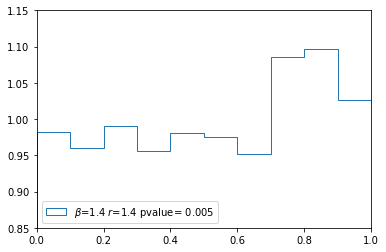

In [12]:
alpha = 0.01

for i in range(len(VoidCats)):    
    if(VoidCats[i][2].shape != (1,1)):
        beta   = VoidCats[i][0]
        nrand  = VoidCats[i][1]
        theta  = abs(VoidCats[i][2][Axis + "_x"])
        D, pvalue = scipy.stats.kstest(theta, "uniform")
        if pvalue < alpha:
            print(beta, nrand, np.round(D, decimals=3), np.round(pvalue, decimals=4), i )
            N += 1
            
            plt.hist(theta, bins=10, density=True, histtype="step",
                    label= r"$\beta$=" + str(beta) + r" $r$=" + str(nrand) +
                     " pvalue= " + str( np.round(pvalue, decimals=3)) )

plt.ylim(0.85,1.15)
plt.xlim(0,1)
plt.legend(loc=3)

In [13]:
def ks_critical_value(n_trials, alpha):
    return scipy.stats.ksone.ppf(1-alpha/2, n_trials)

In [14]:
ks_critical_value(8000, 0.001)

0.021774118427425774

1.0 1.0 0.015 0.3411 0
1.4 1.4 0.024 0.0055 14


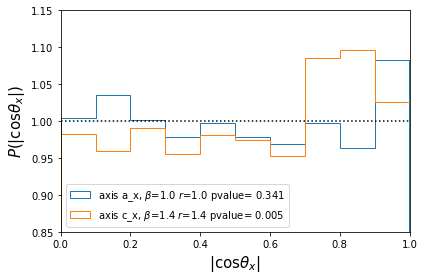

In [15]:
alpha = 0.05

Axis=["a_x", "c_x"]
I=[0, 14] 

for i,axis in zip(I, Axis):
    beta   = VoidCats[i][0]
    nrand  = VoidCats[i][1]
    theta  = abs(VoidCats[i][2][axis])
    D, pvalue = scipy.stats.kstest(theta, "uniform")
    if pvalue > 0:
        print(beta, nrand, np.round(D, decimals=3), np.round(pvalue, decimals=4), i )
        N += 1

        plt.hist(theta, bins=10, density=True, histtype="step",
                label= "axis " + axis + ", "
                 r"$\beta$=" + str(beta) + r" $r$=" + str(nrand) +
                 " pvalue= " + str( np.round(pvalue, decimals=3)) )

plt.axhline(y=1.0, linestyle="dotted", color="k")

plt.xlabel(r"$|\cos\theta_x|$", fontsize=15)
plt.ylabel(r"$P(|\cos\theta_x|)$", fontsize=15)
plt.xlim(0,1)
plt.ylim(0.85,1.15)
plt.legend(loc=3)
plt.tight_layout()
plt.savefig("figures/isotropic_orientation.pdf")

In [16]:
VoidCats[12]

[1.4,
 1.0,
 array([(    0,  228.24080889, -232.9535161 ,  256.71339567, 59, 26.97737693, 49.5199121 , 21.22763756, 18.67745208, -0.84669576, -0.48875221, -0.21030351,  0.12370866, -0.56524693,  0.81559308, -0.51749633,  0.66454284, 0.53905507),
        (    2,  291.4496748 ,  -32.35174565,  -23.26991871, 57, 27.13707904, 33.85291341, 25.7725366 , 22.90530523, -0.98231189,  0.05269082,  0.17968594,  0.18487872,  0.12061097,  0.97533218, -0.02971896, -0.9913005 , 0.128219  ),
        (    3,   71.56027583,  159.76697512, -218.27517272,  6, 10.70305986, 13.50393011, 11.22232782,  8.09059999, -0.37390581, -0.85631329, -0.35626114,  0.86155743, -0.46290536,  0.20841645, -0.34338496, -0.22901132, 0.91084608),
        ...,
        (15837,  128.487501  ,  231.25074626, -310.96573665,  7, 11.35825361, 19.06144855,  9.67802172,  7.94313951,  0.3912009 ,  0.8931112 , -0.22206809,  0.79131399, -0.44962893, -0.41431387,  0.4698766 ,  0.01364563, 0.88262664),
        (15841, -175.40269708, -114.300

In [17]:
len(VoidCats)

36

1.0 1.0 0.015 0.3411 0
1.0 1.2 0.012 0.4412 1
1.0 1.4 0.009 0.7867 2
1.0 1.6 0.02 0.0233 3
1.2 1.0 0.012 0.488 6
1.2 1.2 0.012 0.4331 7
1.2 1.4 0.018 0.0582 8
1.2 1.6 0.015 0.1643 9
1.4 1.0 0.011 0.5665 12
1.4 1.2 0.012 0.4274 13
1.4 1.4 0.022 0.0111 14
*
1.4 1.6 0.012 0.5229 15
1.6 1.0 0.016 0.1519 18
1.6 1.2 0.012 0.4402 19
1.6 1.4 0.014 0.2841 20
1.6 1.6 0.011 0.6328 21
1.8 1.0 0.017 0.1394 24
1.8 1.2 0.012 0.5223 25
1.8 1.4 0.009 0.7981 26
1.8 1.6 0.017 0.1595 27
2.0 1.0 0.015 0.2708 30
2.0 1.2 0.011 0.6135 31
2.0 1.4 0.02 0.0674 32
2.0 1.6 0.017 0.2006 33


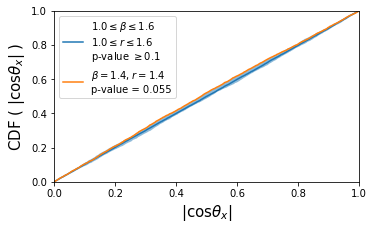

In [18]:
alpha = 1

axis="a_c"

index = []
for i in range(len(VoidCats)):
    nrand  = VoidCats[i][1]    
    if nrand <= 1.6:
        index.append(i)
N_bins=1000
Y_hist = []
X_bins = []

Y_special = 0

for i in index:
    beta   = VoidCats[i][0]
    nrand  = VoidCats[i][1]  
    if nrand <= 1.6:
        theta  = abs(VoidCats[i][2]["a_x"])
        D, pvalue = scipy.stats.kstest(theta, "uniform")
        if pvalue > 0:
            print(beta, nrand, np.round(D, decimals=3), np.round(pvalue, decimals=4), i )
            N += 1
            Y, X_bins = np.histogram(theta, bins=N_bins, density=True)
                     #label= "axis " + axis + ", "r"$\beta$=" + str(beta) + r" $r$=" + str(nrand) +" pvalue= " + str( np.round(pvalue, decimals=3)) )
            Y_hist.append(np.cumsum(Y))
            if(i==14):
                print("*")
                Y_special = Y
            
Y_hist = np.array(Y_hist)/N_bins
X = np.array(X_bins)
X = (X[1:]+X[:-1])*0.5

Y_per = []
for i in range( Y_hist.shape[1]):
    Y_per.append(np.percentile(Y_hist[:,i], [0,50,100]))
    
Y_per = np.array(Y_per).T
Y_per

fig = plt.figure(figsize=(5,3))

plt.fill_between(X, Y_per[0], Y_per[2], alpha=0.5)
plt.plot(X, Y_per[1], label= r"$1.0 \leq \beta \leq 1.6$"+
                            "\n$1.0 \leq r \leq 1.6$"+
                            "\np-value $\geq 0.1$")
plt.plot(X, np.cumsum(Y_special)/N_bins, label=r"$\beta=1.4$, $r=1.4$"+
                                               "\np-value = 0.055")

plt.xlabel(r"$|\cos\theta_x|$", fontsize=15)
plt.ylabel(r"CDF ( $|\cos \theta_x|$ )", fontsize=15)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc=2)
plt.tight_layout(pad=0, rect=[0,0,1,1])
plt.savefig("figures/isotropic_orientation.pdf")